# $\underline{Импорт\;основных\;библиотек}$

In [3]:
import pandas as pd 
from NormalityTest import *
from IPython.display import display,Math, HTML
import numpy as np 
from math import log
import matplotlib.pyplot as plt


# $\underline{Подготовка\;фрейма\;p-values\;критерия\;Саркади\;по\;логарифмическим\;доходностям\;компаний\;по\;годам}$

In [4]:
## Функция расчета лог. доходности конкретной компании за конкретный год
## type - [year, half_year, quarter]
def LogYield(ticker,year,type):
    LY = []
    if type == "year":
        df = pd.read_csv(ticker + '.csv',sep = ';')
        condition = (df['<DATE>'] >= year * 10000) & (df['<DATE>'] <= (year + 1) * 10000) 
        TempClose = list(df[condition]['<CLOSE>'])
        LY = [log(TempClose[i+1]/TempClose[i]) for i in range(len(TempClose)-1)]
        
    if type == "half_year":
        df = pd.read_csv(ticker + '.csv',sep = ';')
        condition = (df['<DATE>'] >= int(str(year) + '0615')) & (df['<DATE>'] <= (year + 1) * 10000) 
        TempClose = list(df[condition]['<CLOSE>'])
        LY = [log(TempClose[i+1]/TempClose[i]) for i in range(len(TempClose)-1)]
        
    if type == "quarter":
        df = pd.read_csv(ticker + '.csv',sep = ';')
        condition = (df['<DATE>'] >= int(str(year) + '1015')) & (df['<DATE>'] <= (year + 1) * 10000) 
        TempClose = list(df[condition]['<CLOSE>'])
        LY = [log(TempClose[i+1]/TempClose[i]) for i in range(len(TempClose)-1)]
        
    return np.array(LY)


In [1]:
quantity = 48

def FrameCalc(period, sign_lvl):
    display(HTML(r'<hr>'))
    global quantity
    tickers = [
    'MSFT',
    'INTC',
    'ADBE',
    'GLW',
    'CSCO',
    'STX'
    ]

    years = [iter for iter in range(2012,2020)]

    df = pd.DataFrame({
        'Компания': tickers
    })
    
    k1, k2 = 0, 0
    values_to_hist = [] 
    for year in years:
        year_data = []
        for ticker in tickers:
            year_data.append(round(Sample(LogYield(ticker,year, type = period)).sarkadi(),3))
        k1 += len(list(filter(lambda x: x > sign_lvl[0],year_data)))
        k2 += len(list(filter(lambda x: x > sign_lvl[1],year_data)))
        df[year] = year_data
        values_to_hist += year_data
        
        
    if period == 'year':
        display(Math(r'\cdotРассматриваеммый\;период:\;1\;год'))
    if period == 'half_year':
        display(Math(r'\cdotРассматриваеммый\;период:\;Второе\;полугодие'))
    if period == 'quarter':
        display(Math(r'\cdotРассматриваеммый\;период:\;последний\;квартал'))
        
    display(Math(r'1)Уровень\;значимости:\;' + str(sign_lvl[0])))
    display(Math(r'Доля\;проверок,\;в\;которых\;гипотеза\;не\;отвергнута:\;' + str(round(100*k1/quantity,2)) + '\%'  ))
    display(Math(r'2)Уровень\;значимости:\;' + str(sign_lvl[1])))
    display(Math(r'Доля\;проверок,\;в\;которых\;гипотеза\;не\;отвергнута:\;' + str(round(100*k2/quantity,2)) + "\%"))
    
    med_year = pd.DataFrame({
        "Год": [iter for iter in range(2012,2020)],
        'Медиана': list(df.median())
    })
    med_comp = pd.DataFrame({
        "Компания": tickers,
        'Медиана': list(df.median(axis = 1))
    })
    display(med_year)
    display(med_comp)
    `
    %matplotlib notebook
    plt.title("Гистограмма частот p-value")
    plt.grid()
    plt.hist(
        values_to_hist,
        histtype = 'bar', 
        align = 'mid', 
        alpha = 0.8, 
        edgecolor='k',
        color = 'purple'
    )
    return df


c:\users\вячеслав\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\stats\_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,Год,Медиана
0,2012,0.0010
1,2013,0.0000
2,2014,0.0000
3,2015,0.0035
4,2016,0.0000
5,2017,0.0000
6,2018,0.0000
7,2019,0.0000


,Компания,Медиана
0,MSFT,0.0
1,INTC,0.0
2,ADBE,0.0
3,GLW,0.0
4,CSCO,0.0
5,STX,0.0


<IPython.core.display.Javascript object>


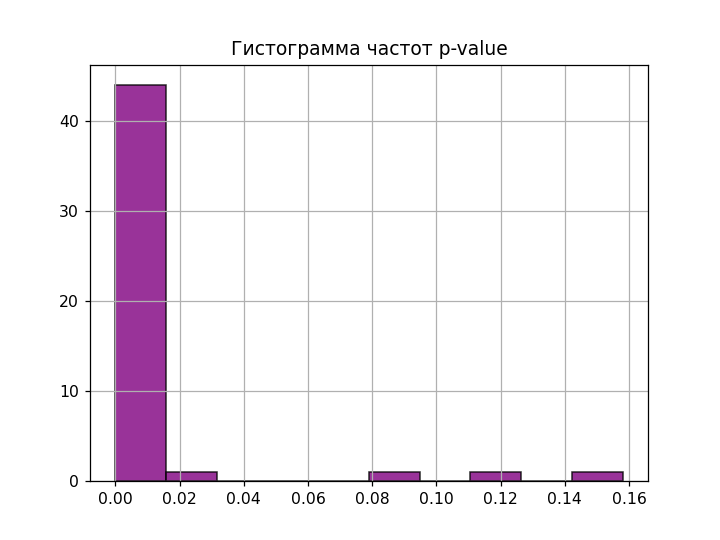

,Компания,2012,2013,2014,2015,2016,2017,2018,2019
0,MSFT,0.002,0.0,0.007,0.000,0.0,0.0,0.000,0.001
1,INTC,0.117,0.0,0.000,0.083,0.0,0.0,0.016,0.000
2,ADBE,0.158,0.0,0.000,0.011,0.0,0.0,0.000,0.000
3,GLW,0.000,0.0,0.000,0.002,0.0,0.0,0.000,0.000
4,CSCO,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.000
5,STX,0.000,0.0,0.000,0.005,0.0,0.0,0.000,0.000


In [5]:
FrameCalc("year",[0.05,0.01])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,Год,Медиана
0,2012,0.0185
1,2013,0.0000
2,2014,0.0060
3,2015,0.0215
4,2016,0.0000
5,2017,0.0000
6,2018,0.0000
7,2019,0.0070


,Компания,Медиана
0,MSFT,0.0000
1,INTC,0.0305
2,ADBE,0.0000
3,GLW,0.0000
4,CSCO,0.0000
5,STX,0.0020


<IPython.core.display.Javascript object>


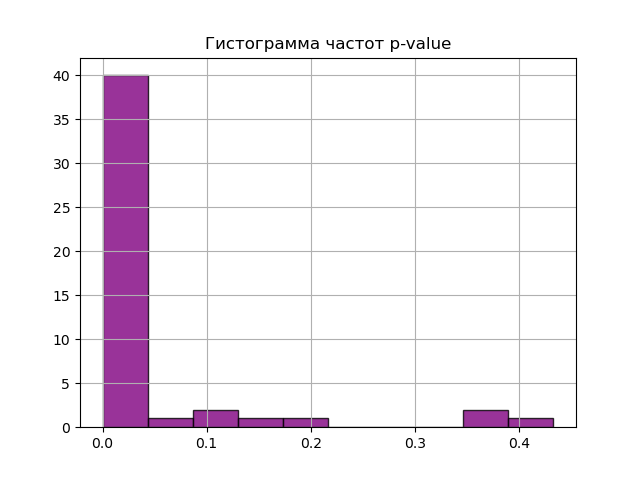

,Компания,2012,2013,2014,2015,2016,2017,2018,2019
0,MSFT,0.350,0.000,0.098,0.000,0.0,0.0,0.000,0.022
1,INTC,0.169,0.000,0.000,0.213,0.0,0.0,0.118,0.061
2,ADBE,0.037,0.000,0.000,0.042,0.0,0.0,0.000,0.005
3,GLW,0.000,0.000,0.000,0.001,0.0,0.0,0.000,0.009
4,CSCO,0.000,0.000,0.015,0.000,0.0,0.0,0.000,0.000
5,STX,0.000,0.377,0.012,0.433,0.0,0.0,0.000,0.004


In [9]:
FrameCalc("half_year",[0.05,0.01])

c:\users\вячеслав\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\users\вячеслав\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\вячеслав\appdata\local\programs\python\python38-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\вячеслав\appdata\local\programs\python\python38-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\вячеслав\appdata\local\programs\python\python38-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  co

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,Год,Медиана
0,2012,0.2550
1,2013,0.0035
2,2014,0.1200
3,2015,0.0395
4,2016,0.0020
5,2017,0.0000
6,2018,0.4810
7,2019,0.1470


,Компания,Медиана
0,MSFT,0.1685
1,INTC,0.0690
2,ADBE,0.0040
3,GLW,0.0005
4,CSCO,0.0400
5,STX,0.1250


<IPython.core.display.Javascript object>


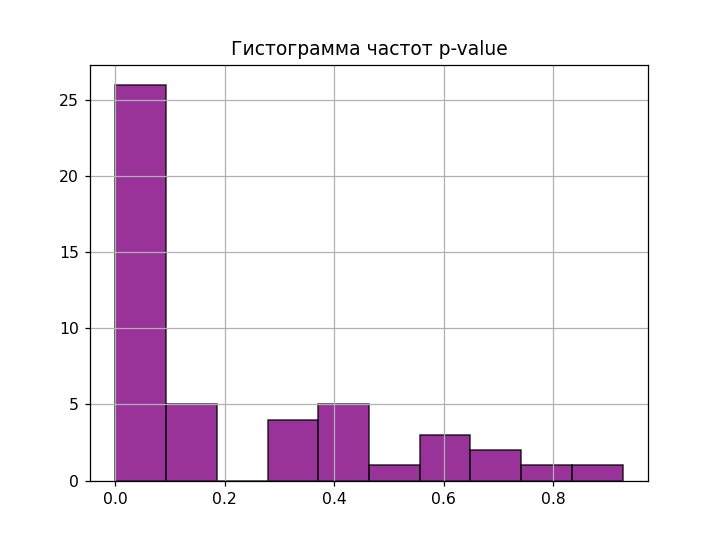

,Компания,2012,2013,2014,2015,2016,2017,2018,2019
0,MSFT,0.671,0.016,0.396,0.000,0.002,0.000,0.321,0.560
1,INTC,0.693,0.007,0.131,0.582,0.002,0.001,0.745,0.000
2,ADBE,0.008,0.000,0.000,0.553,0.370,0.000,0.146,0.000
3,GLW,0.000,0.000,0.109,0.000,0.001,0.000,0.927,0.294
4,CSCO,0.358,0.000,0.395,0.079,0.001,0.001,0.641,0.000
5,STX,0.152,0.397,0.098,0.000,0.403,0.000,0.057,0.425


In [7]:
FrameCalc("quarter",[0.05,0.01])